The following is a histogram showing average accuracy of each model on the test set.

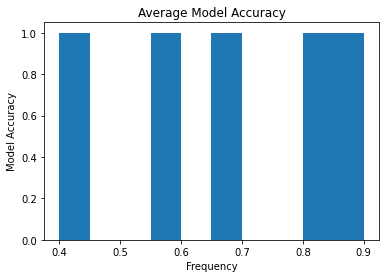

In [92]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

modelObj = {
    'OverFeat': 0.8,
    'R-CNN': 0.6,
    'Fast-RCNN': 0.7,
    'Faster-RCNN': 0.9,
    'YOLO': 0.4,
}

# plot the modelObj as a histogram
plt.hist(list(modelObj.values()), bins=10)
plt.ylabel('Model Accuracy')
plt.xlabel('Frequency')
plt.title('Average Model Accuracy')
plt.show()  


The following is a box and whisker plot showing the distribution of accuracy for each model.

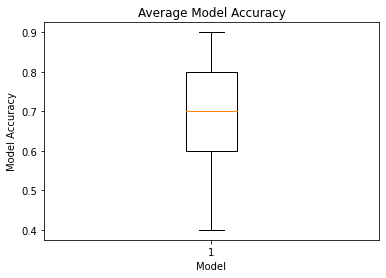

In [33]:
# generate a box and whisker plot of the modelObj
plt.boxplot(list(modelObj.values()))
plt.ylabel('Model Accuracy')
plt.xlabel('Model')
plt.title('Average Model Accuracy')
plt.show()


Generate a scatter plot of the modelObj

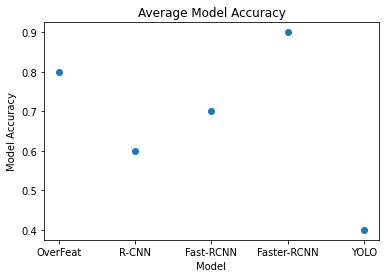

In [37]:
# generate a scatter plot of the modelObj
plt.scatter(list(modelObj.keys()), list(modelObj.values()))
plt.ylabel('Model Accuracy')
plt.xlabel('Model')
plt.title('Average Model Accuracy')
plt.show()

The following is a pair plot showing the relationship between the features and the target.

In [1]:
from dataclasses import dataclass

@dataclass(frozen=True, order=True)
class Cuboid:
    uuid: str
    label: str
    position: tuple
    dimensions: tuple
    yaw: float
    stationary: bool
    camera_used: int = -1
    attributes: tuple = ()
    points_count: int = 0


import json

cuboids = [] 
with open('./cadcd/object-recognition-autonomous-vehicles/cadcd/2018_03_06/object-recognition-autonomous-vehicles/cadcd/2018_03_06/0002/3d_ann.json') as f:
    data = json.load(f)
    for cuboid in data:
        for cuboid_obj in cuboid['cuboids']:
            cuboid_obj = Cuboid(
                uuid=cuboid_obj['uuid'],
                label=cuboid_obj['label'],
                position=cuboid_obj['position'],
                dimensions=cuboid_obj['dimensions'],
                yaw=cuboid_obj['yaw'],
                stationary=cuboid_obj['stationary'],
                camera_used=cuboid_obj['camera_used'],
                attributes=cuboid_obj['attributes'],
                points_count=cuboid_obj['points_count']
            )
            cuboids.append(cuboid_obj)
            
plt.xlabel('Vehicle')
plt.ylabel('Frequency')
plt.title('Vehicle Frequency')
plt.hist([cuboid.label for cuboid in cuboids], bins=10)

    

FileNotFoundError: [Errno 2] No such file or directory: './cadcd/object-recognition-autonomous-vehicles/cadcd/2018_03_06/object-recognition-autonomous-vehicles/cadcd/2018_03_06/0002/3d_ann.json'

(array([4.486e+03, 2.860e+02, 1.530e+02, 1.180e+02, 7.800e+01, 3.500e+01,
        6.000e+00, 6.000e+00, 5.000e+00, 5.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([   0.  ,  104.25,  208.5 ,  312.75,  417.  ,  521.25,  625.5 ,
         729.75,  834.  ,  938.25, 1042.5 , 1146.75, 1251.  , 1355.25,
        1459.5 , 1563.75, 1668.  , 1772.25, 1876.5 , 1980.75, 2085.  ]),
 <BarContainer object of 20 artists>)

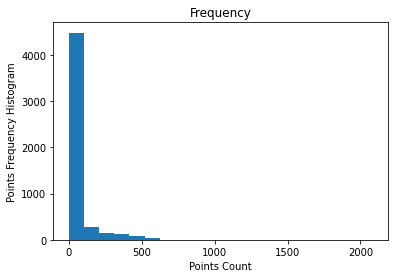

In [122]:
plt.xlabel('Points Count')
plt.ylabel('Points Frequency Histogram')
plt.title('Frequency')
plt.hist([cuboid.points_count for cuboid in cuboids], bins=20)


<BarContainer object of 7 artists>

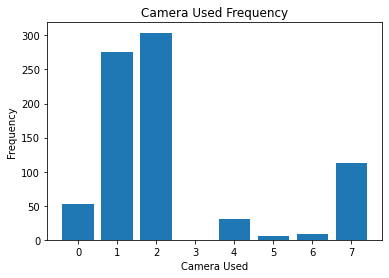

In [121]:
# create a histogram for the values of the attributes camera_used
plt.xlabel('Camera Used')
plt.ylabel('Frequency')
plt.title('Camera Used Frequency')

camera_used_dict = {}
for cuboid in cuboids:
    if cuboid.camera_used in camera_used_dict:
        camera_used_dict[cuboid.camera_used] += 1
    else:
        camera_used_dict[cuboid.camera_used] = 1

# remove None from the dictionary
camera_used_dict.pop(None, None)
plt.bar(list(camera_used_dict.keys()), list(camera_used_dict.values()))

<BarContainer object of 4 artists>

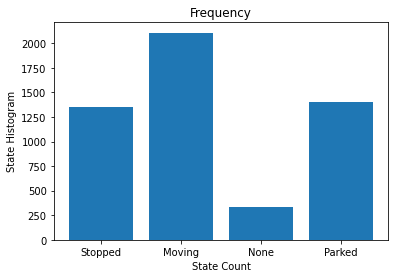

In [120]:
plt.xlabel('State Count')
plt.ylabel('State Histogram')
plt.title('Frequency')

state_dict = {}
# create a dict of the states
for cuboid in cuboids:
    attr = cuboid.attributes
    try: 
        state = attr['state']
    except KeyError:
        state = 'None'
    if state in state_dict:
        state_dict[state] += 1
    else:
        state_dict[state] = 1

plt.bar(list(state_dict.keys()), list(state_dict.values()))